# **PROYECTO FINAL: VISUAL ANALYTICS CON PYTHON**
# **CASO: BOSTON VIVIENDA**
### **Integrantes**
- Alonso Herrera
- Katterine Poquis
- Milton Santisteban


## **ETAPA 1:** Entendimiento contextual del proyecto a desarrollar


### **1.1 Contexto del problema**

La empresa del rubro inmobiliario está interesada en identificar las mejores zonas para invertir en bienes raíces dentro del estado de Boston, EE.UU.  
Para ello, busca entender **cómo influyen las características de una zona o vivienda en su precio de mercado**, con el fin de tomar decisiones estratégicas de inversión.  
El análisis se basa en un conjunto de datos históricos de viviendas ocupadas por sus propietarios, el cual incluye aspectos sociales, estructurales y geográficos.

El desafío radica en desarrollar una herramienta basada en analítica de datos que **prediga el valor medio de las viviendas (`medv`)**, permitiendo así seleccionar ubicaciones con mayor potencial de retorno económico.

---

In [5]:
# Importar pandas para cargar y ver el archivo
import pandas as pd

# Cargar el archivo (subido previamente)
url = 'bostonvivienda.csv'
df_train = pd.read_csv(url, encoding='latin1')

# Ver las primeras 10 filas
df_train.head(10)

,crim,zn,indus,nox,rm,edad,dis,rad,impuesto,ptratio,negro,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


### **1.2 Objetivos del Proyecto**

#### &nbsp;&nbsp; **1.2.1 Objetivo General:**
Desarrollar un modelo de aprendizaje automático que permita predecir el **precio medio de las viviendas** en función de sus características, utilizando técnicas de regresión supervisada.

#### &nbsp;&nbsp; **1.2.2 Objetivos Específicos:**
- Comprender la relación entre las variables del entorno y el valor de una vivienda.
- Identificar las variables más influyentes en el precio de los inmuebles.
- Comparar distintos modelos predictivos para seleccionar el más preciso.
- Entregar conclusiones y recomendaciones basadas en datos para apoyar decisiones de inversión inmobiliaria.

---

### **1.3 Variables y Tipos de Variables**

| Variable | Descripción | Tipo |
|----------|-------------|------|
| `crim` | Tasa de criminalidad per cápita por ciudad | Numérica continua |
| `zn` | Porcentaje de terrenos residenciales para lotes > 25,000 pies² | Numérica continua |
| `indus` | Porcentaje de acres para negocios no minoristas por ciudad | Numérica continua |
| `nox` | Concentración de óxidos de nitrógeno (contaminación del aire) | Numérica continua |
| `rm` | Número promedio de habitaciones por vivienda | Numérica continua |
| `age` | % de viviendas construidas antes de 1940 | Numérica continua |
| `dis` | Distancia promedio a 5 centros laborales de Boston | Numérica continua |
| `rad` | Índice de acceso a autopistas radiales | Numérica discreta |
| `impuesto` | Tasa de impuesto predial por $10,000 | Numérica continua |
| `ptratio` | Proporción alumno/profesor por ciudad | Numérica continua |
| `black` | 1000(Bk - 0.63)², donde Bk es la proporción de negros por ciudad | Numérica continua |
| `lstat` | % de población con bajo estatus socioeconómico | Numérica continua |
| `medv` | Valor medio de viviendas en miles de USD (**variable objetivo**) | Numérica continua |

---

La mayoría de variables son **numéricas continuas**, lo que favorece el uso de modelos de regresión. Por otro lado, no hay variables categóricas en este dataset, lo que simplifica el preprocesamiento.



In [6]:
# Mostrar la estructura del DateFrame (nombres,tipos de datos,valores no nulos)
# Entender rapidamente la calidad de los datos antes de analizarlos o
# limpiarlos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   crim      506 non-null    float64
 1   zn        506 non-null    float64
 2   indus     506 non-null    float64
 3   nox       506 non-null    float64
 4   rm        506 non-null    float64
 5   edad      506 non-null    float64
 6   dis       506 non-null    float64
 7   rad       506 non-null    int64  
 8   impuesto  506 non-null    int64  
 9   ptratio   506 non-null    float64
 10  negro     506 non-null    float64
 11  lstat     506 non-null    float64
 12  medv      506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


- No hay valores nulos en ninguna columna, lo cual es excelente para el análisis ya que no se requiere limpieza por valores faltantes.
- Esta estructura es ideal para aplicar modelos de regresión lineal o regresión de machine learning, ya que casi todos los atributos son numéricos.
- El dataset está bien estructurado, completo y listo para el análisis exploratorio (EDA) y la aplicación de técnicas predictivas. Lo que podria permitir avanzar directamente al análisis estadístico y visual.

## **ETAPA 2:** Preparación y valor agregado de los Datos
En esta etapa revisaremos la data y la estructura de la información.


In [7]:
# Muestra el numer de filas (registro) y columnas (variables) respectivamente
df_train.shape

(506, 13)

In [8]:
# Echo un vistazo las columnas:
df_train.columns

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'edad', 'dis', 'rad', 'impuesto',
       'ptratio', 'negro', 'lstat', 'medv'],
      dtype='object')

In [9]:
# Visualización rápida del contenido de tus datos (10 primeros)
df_train.head(10)

,crim,zn,indus,nox,rm,edad,dis,rad,impuesto,ptratio,negro,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [10]:
# Visualización rápida del contenido de tus datos (10 ultimos)
df_train.tail(10)

,crim,zn,indus,nox,rm,edad,dis,rad,impuesto,ptratio,negro,lstat,medv
496,0.28960,0.0,9.69,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [11]:
# Verificar valores nulos en el dataset
df_train.isnull().sum()

,0
crim,0
zn,0
indus,0
nox,0
rm,0
edad,0
dis,0
rad,0
impuesto,0
ptratio,0


In [12]:
# Guardamos un backup del dataset original
df_train_bk = df_train.copy()

# Eliminamos la variable identificadora de la base
# No eliminamos ninguna columna porque todas las columnas contienen
# variables útiles para el modelo.

El conjunto de datos se encuentra limpio, sin valores nulos ni columnas innecesarias. Está listo para continuar con la etapa de análisis exploratorio y construcción del modelo predictivo.

## **ETAPA 3:** Examen Gráfico y Descriptivo Numérico

In [20]:
# Importar librerías gráficas necesarias
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Descripción Estadística de las Variables
df_train.describe()

,crim,zn,indus,nox,rm,edad,dis,rad,impuesto,ptratio,negro,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### **3.1. Análisis Descriptivo de las Variables Numéricas**

El dataset contiene **506 observaciones** y **13 variables numéricas**. A continuación, presentamos un resumen e interpretación clave para cada grupo de variables:

---

#### **3.1.1. Variables Socioeconómicas y Urbanas**

| Variable   | Descripción                                              | Análisis |
|------------|----------------------------------------------------------|----------|
| `crim`     | Índice de criminalidad por zona                          | Alta dispersión. Algunos valores extremos indican zonas con alta criminalidad, lo cual puede influir negativamente en el valor de la vivienda. |
| `zn`       | Porcentaje de terrenos residenciales (>25,000 pies²)     | La mayoría de los valores son 0. Hay pocos barrios con zonas altamente residenciales (100%), lo que eleva el promedio. |
| `indus`    | Proporción de zonas industriales no comerciales          | Distribución sesgada hacia zonas con baja proporción industrial. |
| `nox`      | Concentración de óxidos de nitrógeno (contaminación)     | Mayor valor = más contaminación. Varía bastante según la zona. |
| `edad`     | % de unidades construidas antes de 1940                  | Promedio alto. Indica que muchas viviendas son antiguas. Puede influir en el valor. |
| `dis`      | Distancia a centros de empleo                            | Barrios más lejanos tienen valores más altos. A mayor distancia, menor congestión. |
| `rad`      | Índice de acceso a autopistas radiales                   | Rango amplio (1 a 24). Zonas con acceso alto pueden tener más tráfico o ser más desarrolladas. |

---

#### **3.1.2. Infraestructura y Servicios**

| Variable   | Descripción                                | Análisis |
|------------|--------------------------------------------|----------|
| `impuesto` | Tasa de impuesto a la propiedad            | Gran variación entre zonas. Puede relacionarse con valorización o carga tributaria. |
| `ptratio`  | Relación alumnos por profesor              | Influye en la calidad educativa, por lo tanto, en el atractivo de la zona. A menor valor, mejor calidad educativa. |
| `negro`    | Proporción poblacional afroamericana (B)   | Codificado. Valores muy altos en general. |
| `lstat`    | % de población con bajo estatus socioeconómico | A mayor valor, menor ingreso promedio. Alta correlación negativa esperada con el precio de vivienda. |

---

#### **3.1.3. Características de la vivienda**

| Variable   | Descripción                                          | Análisis |
|------------|------------------------------------------------------|----------|
| `rm`       | Número promedio de habitaciones por vivienda         | Mayor número de habitaciones generalmente aumenta el valor de la vivienda. |
| `medv`     | Valor medio de la vivienda (en miles de USD)         | Variable objetivo. Tiene un límite superior artificial en 50 (capped), lo que podría afectar modelos predictivos. |

---

#### **3.1.4. Insights clave**

- Algunas variables tienen alta dispersión y valores extremos (`crim`, `zn`, `lstat`, `medv`).
- Posibles correlaciones negativas entre `lstat`, `nox`, `edad` y `medv` y correlación positiva probable entre `rm` y `medv`.
- Puede ser necesario aplicar normalización o transformación a variables sesgadas para modelos de regresión.
- La variable objetivo `medv` tiene un tope máximo en 50, lo que puede requerir técnicas específicas para modelado.

---

#### **3.1.5. Conclusion**
Este análisis nos da una primera visión general del comportamiento y distribución de las variables numéricas. Esto servirá de base para los próximos pasos: visualización gráfica, detección de valores atípicos, correlaciones y construcción del modelo predictivo.

### **3.2. Histograma y Diagrama de Cajas de la Variable Objetivo (`medv`)**
Analizar la distribución del precio de las viviendas.

#### **3.2.1. Histograma Clasico**
Este gráfico muestra la distribución de los valores medios de las viviendas en el dataset. Se visualiza la frecuencia con la que aparece cada rango de precios, permitiendo observar la tendencia general, presencia de valores extremos y concentración de precios.

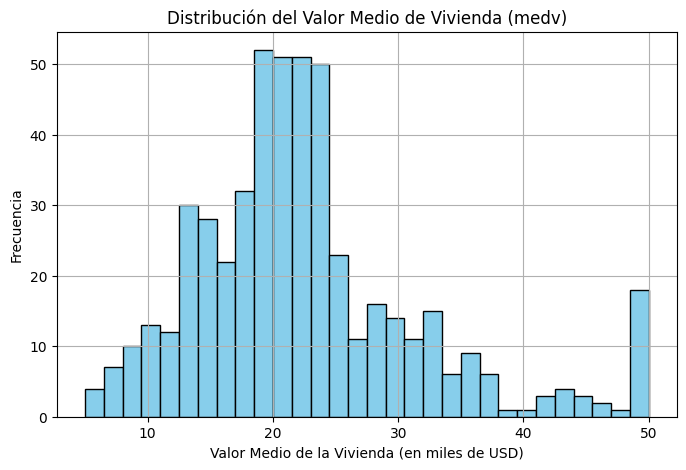

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_train['medv'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del Valor Medio de Vivienda (medv)')
plt.xlabel('Valor Medio de la Vivienda (en miles de USD)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

**Analisis del Histograma**

**Distribución sesgada a la izquierda (negativamente):**

- La mayoría de los valores de `medv` están entre 20 y 25 mil dólares.
- Hay una alta concentración de viviendas en ese rango, lo que indica que estas son las más comunes.
- Sin embargo, se nota un pico abrupto en el valor 50, lo cual no es casualidad.

**Presencia de un techo (valor máximo):**

- El valor `medv` = 50 aparece con alta frecuencia. Este es un tope artificial en la base de datos original del Boston Housing Dataset.
- Este límite trunca la distribución superior e impide observar con precisión los valores reales por encima de 50.
- Esto puede afectar los modelos de regresión, especialmente si muchos datos están “aplanados” en ese techo.

**Valores mínimos:**

- Hay viviendas con precios muy bajos (menos de 10 mil dólares), aunque son pocos casos. Podrían representar zonas deterioradas o en condiciones menos favorables.

#### **3.2.2. Histograma con KDE (curva de Densidad)**
Este histograma incluye una curva de densidad (KDE) que permite observar la forma de la distribución de los valores medios de las viviendas. Se aprecia si la distribución es normal, simétrica o sesgada, lo cual es útil para análisis estadístico y modelos predictivos.

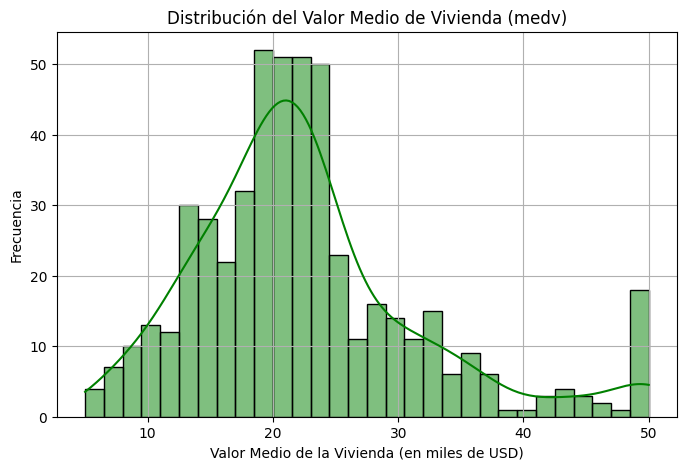

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df_train['medv'], kde=True, bins=30, color='green')
plt.title('Distribución del Valor Medio de Vivienda (medv)')
plt.xlabel('Valor Medio de la Vivienda (en miles de USD)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


**Analisis**

- `medv` no sigue una distribución normal, lo que puede afectar la validez de ciertos modelos lineales.
- El techo en 50 puede ocultar información relevante sobre las viviendas de mayor valor.
- La curva KDE confirma que el modelo debe manejar adecuadamente la asimetría y la censura de los valores altos.

#### **3.2.3. Diagrama de Cajas**
Para observar la dispersión de los valores medios de las viviendas, destacando posibles valores atípicos y la simetría de la distribución. Es una herramienta útil para evaluar la calidad y estabilidad de los datos antes de aplicar modelos predictivos.


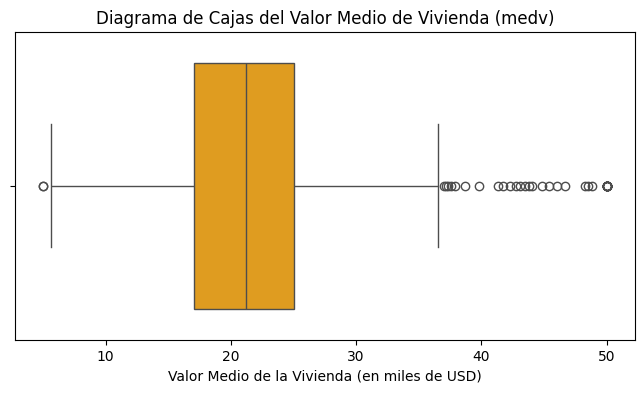

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_train['medv'], color='orange')
plt.title('Diagrama de Cajas del Valor Medio de Vivienda (medv)')
plt.xlabel('Valor Medio de la Vivienda (en miles de USD)')
plt.show()

**Analisis**
- El valor medio de la vivienda en Boston está centrado alrededor de 21-22 mil dólares.
- Hay una gran cantidad de viviendas con el valor máximo permitido (50 mil USD), lo que indica posible censura en los datos.
- Existen outliers que deben considerarse al entrenar modelos predictivos, ya que podrían afectar los resultados si no se gestionan adecuadamente.

### **3.3. Tratamiento de atípicos (sólo para variables numéricas)**
 Para detectar si hay valores muy bajos (cola inferior) o muy altos (cola superior).

In [23]:
# Identificación de la cola inferior de la variable medv
df_train['medv'].describe(percentiles = [0.01, 0.025, 0.05, 0.1, 0.5, 0.75])

,medv
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
1%,7.010000
2.5%,8.300000
5%,10.200000
10%,12.750000
50%,21.200000
75%,25.000000


**Interpretacion:**
- El 1% de las viviendas tiene un valor menor a 7.01 mil USD.
- El mínimo valor registrado es 5 mil USD.
- Estos valores están muy por debajo del promedio (22.53 mil USD) y de la mediana (21.20 mil USD), lo cual podría indicar valores atípicos inferiores. Sin embargo, son consistentes con el mínimo observado (5.0).

**Que hacer:**
- Analizar más a fondo: ¿son viviendas realmente deterioradas? ¿zonas inseguras?

- Si afectan el modelo de predicción, se deberia:

  **Excluirlos** temporalmente para comparar resultados.

  **Reetiquetarlos o transformarlos** (logaritmo, por ejemplo).
- No hay indicios claros de errores o datos extremos inválidos, por lo tanto, no es necesario eliminar estos registros.

In [24]:
# Identificación cola superior
df_train['medv'].describe(percentiles = [0.5, 0.75, 0.9, 0.95, 0.975, 0.99])

,medv
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
50%,21.200000
75%,25.000000
90%,34.800000
95%,43.400000
97.5%,50.000000
99%,50.000000


**Interpretacion:**
- El 2.5% de las viviendas tiene un valor igual al máximo (50 mil dólares).
- Eso indica una acumulación de valores en el techo (posiblemente porque el dataset tenía un tope máximo en la medición).
- Esto puede afectar modelos de regresión si no se trata adecuadamente, ya que pueden considerar esas viviendas como más valiosas de lo que realmente son.

**Que hacer:**
- **Mantener los datos:** Ya que aunque hay acumulación en 50 mil, no hay errores evidentes. Solo tener en cuenta que esto puede influir en algunos modelos.
- En modelos avanzados, se podría aplicar transformaciones como log(`medv`) para reducir el sesgo de valores altos.

**Conclusion**

A través del análisis de percentiles de la variable `medv`, se identificaron valores extremos tanto en la cola inferior como superior. En la parte baja, los valores mínimos se mantienen dentro de rangos esperados y no representan outliers significativos. En la cola superior, se observó una concentración en el valor máximo permitido (50), indicando una posible censura en el dataset original. Aunque no se eliminarán estos valores, se tendrá en cuenta su impacto en la modelación. No se realizará tratamiento de atípicos en esta etapa.

#### **3.3.1. Revisando las variables explicactivas cuantitativas**
Se revisa la distribución individual de cada variable cuantitativa explicativa (es decir, las que podrían influir en `medv`).

In [25]:
# Extraemos las variables cuantitativas (todas las que describe el método .describe())
lista_cuantitativas = list(df_train.describe().columns)
lista_cuantitativas

['crim',
 'zn',
 'indus',
 'nox',
 'rm',
 'edad',
 'dis',
 'rad',
 'impuesto',
 'ptratio',
 'negro',
 'lstat',
 'medv']

In [26]:
# Obtenemos las columnas numéricas del dataset (cuantitativas)
lista_cuantitativas = list(df_train.describe().columns)

# Mostramos la lista
lista_cuantitativas

['crim',
 'zn',
 'indus',
 'nox',
 'rm',
 'edad',
 'dis',
 'rad',
 'impuesto',
 'ptratio',
 'negro',
 'lstat',
 'medv']

In [27]:
import matplotlib.pyplot as plt

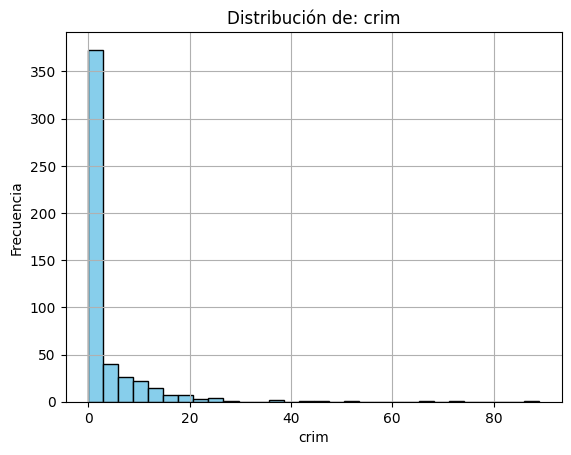

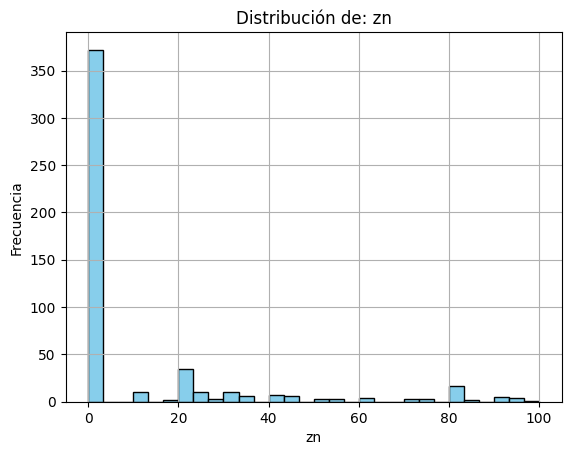

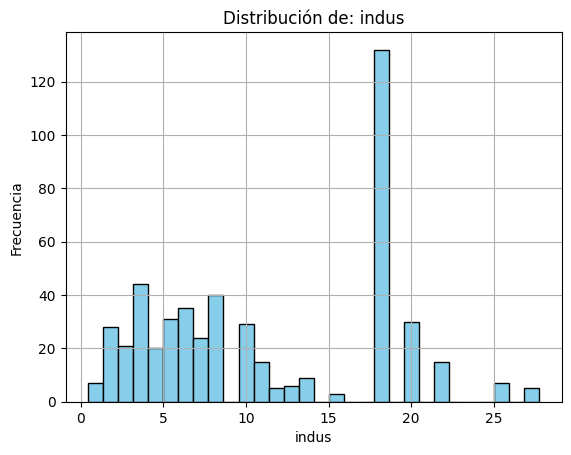

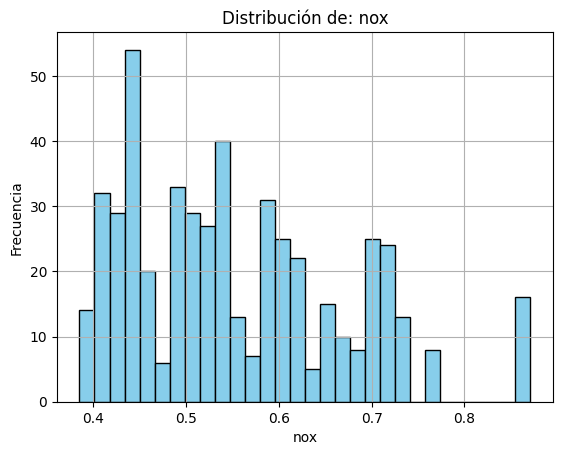

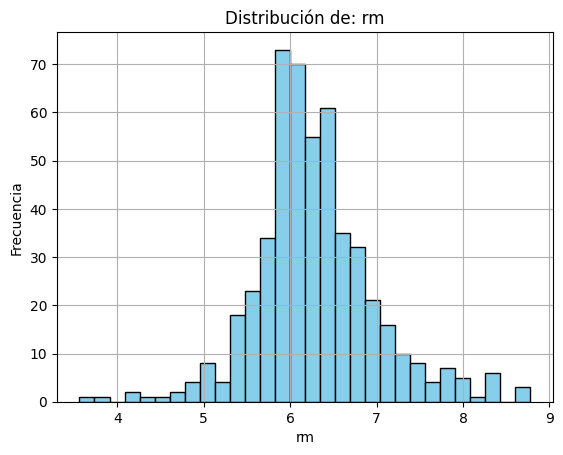

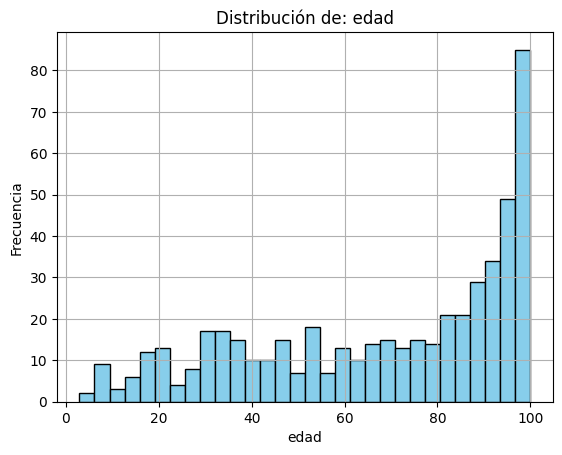

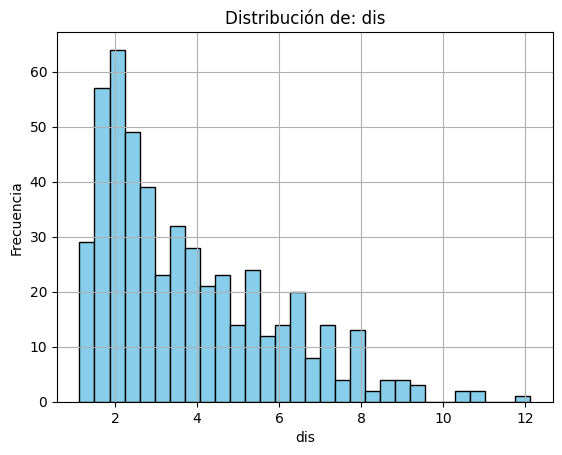

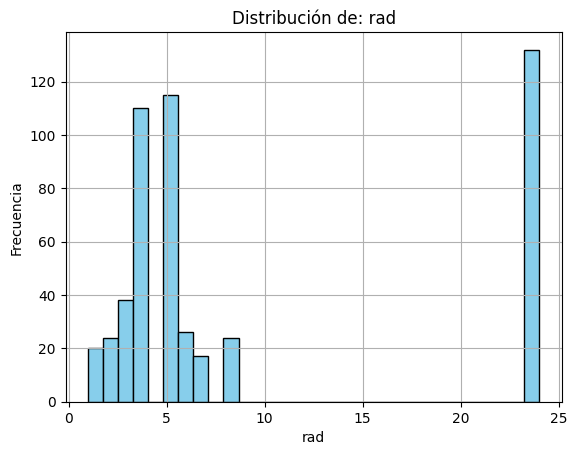

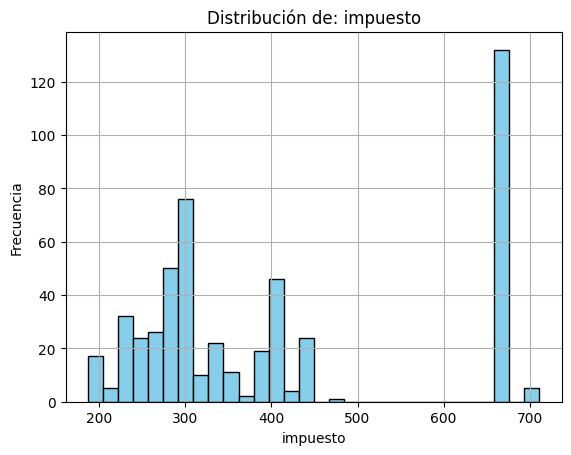

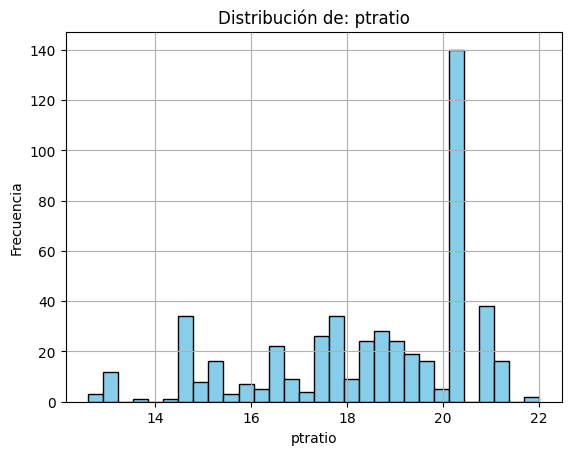

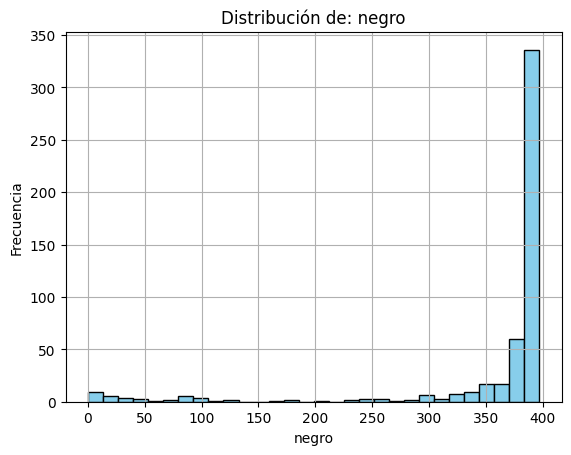

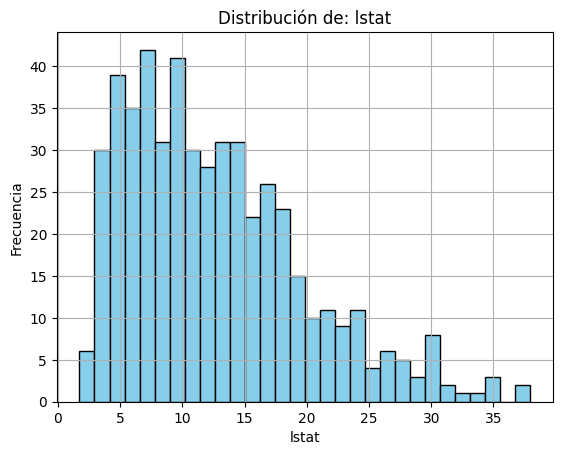

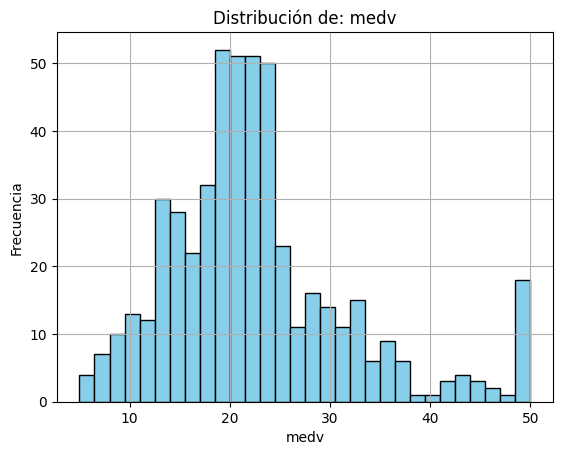

In [28]:
# Histograma para cada variable cuantitativa
for var in lista_cuantitativas:
    df_train[var].plot(kind='hist', title=f'Distribución de: {var}', bins=30, edgecolor='black', color='skyblue')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

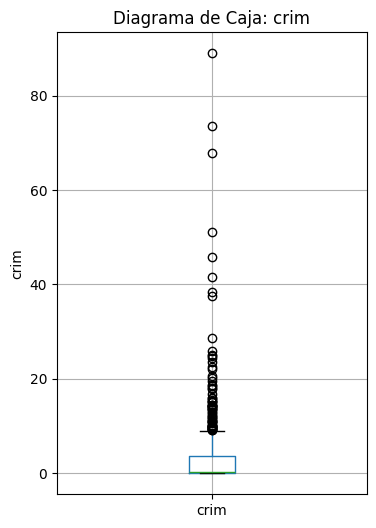

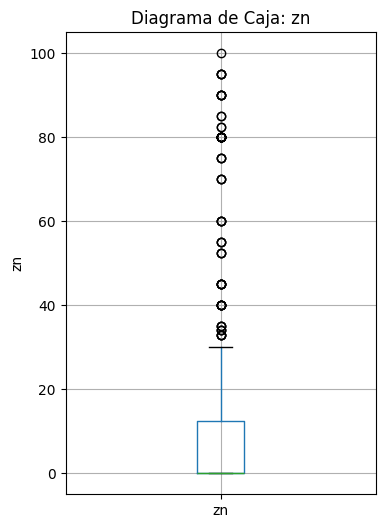

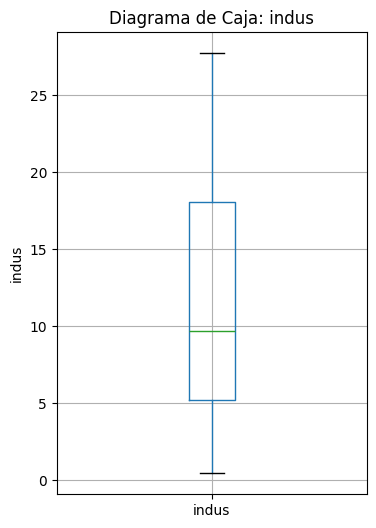

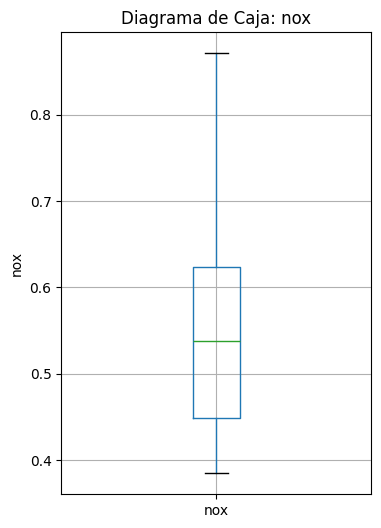

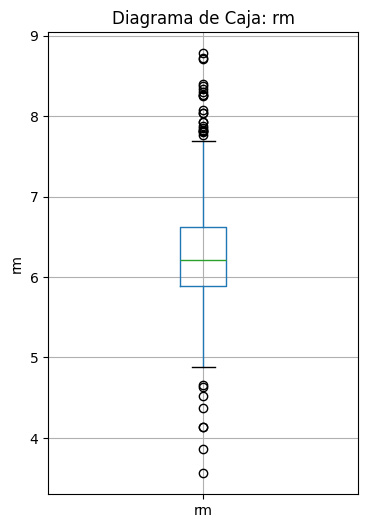

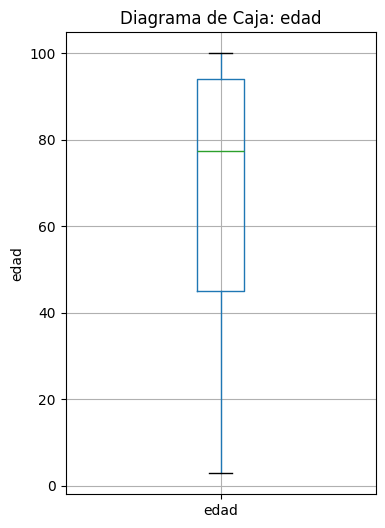

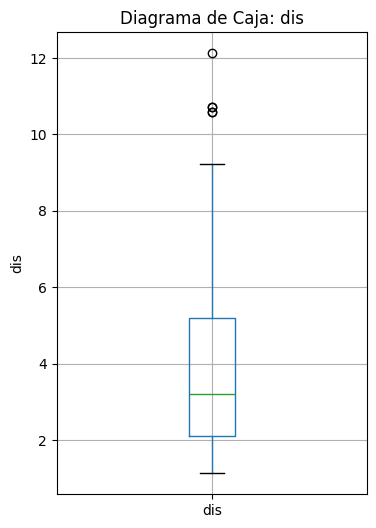

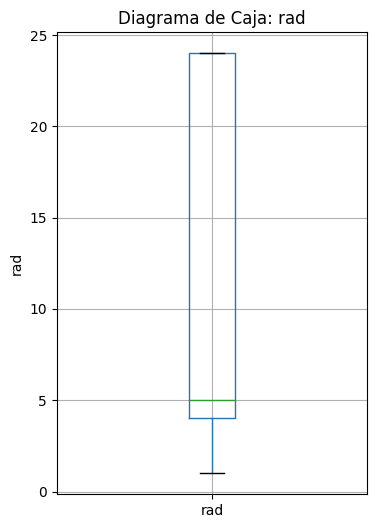

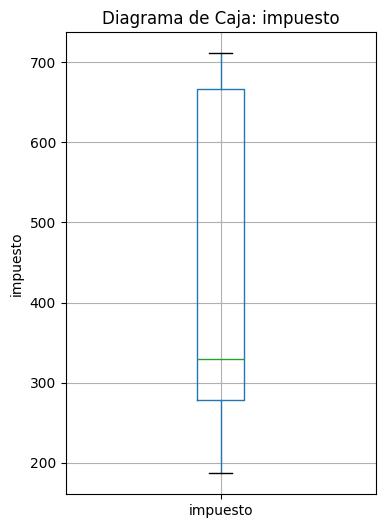

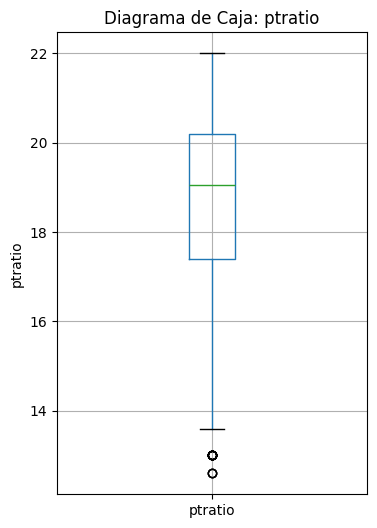

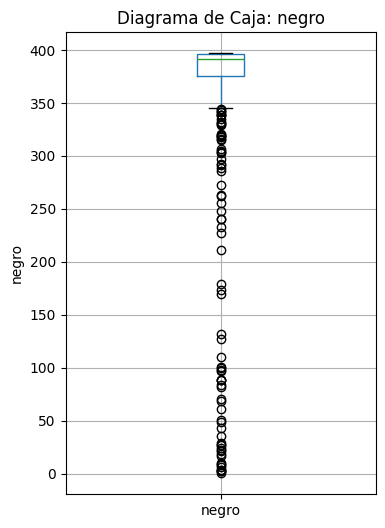

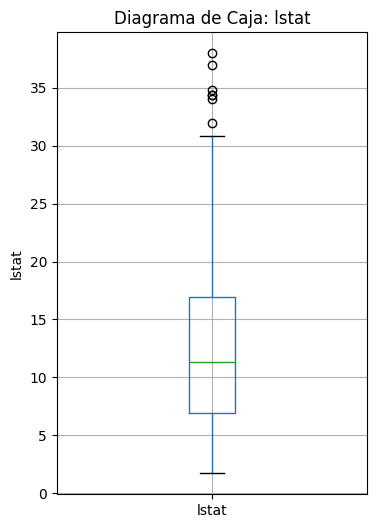

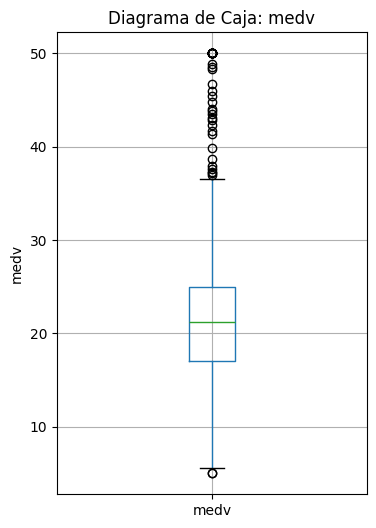

In [29]:
# Diagramas de caja para variables cuantitativas
for var in lista_cuantitativas:
    plt.figure(figsize=(4, 6))  # tamaño vertical
    df_train.boxplot(column=var)
    plt.title(f'Diagrama de Caja: {var}')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

#### **3.3.2. Revisando las variables explicactivas cualitativas**
El dataset de BostonVivienda no tiene variables categóricas nominales explícitas, ya que casi todas son numéricas.

Sin embargo, hay algunas variables que actúan como cualitativas por su naturaleza, aunque estén codificadas numéricamente

| Variable | Significado | Tipo Logico |
|----------|-------------|------|
| `rad` | Índice de accesibilidad a carreteras radiales | Ordinal / Categórica |

##### **3.3.2.1. Tabla de frecuencias (¿cuántas veces aparece cada categoría?)**

In [30]:
df_train['rad'].value_counts().sort_index()

,count
rad,
1,20
2,24
3,38
4,110
5,115
6,26
7,17
8,24
24,132


**Interpretacion:**
- `rad` representa el número de carreteras radiales accesibles desde cada zona.
- Se puede tratar esta variable como ordinal, porque tiene un orden lógico (más accesos = mayor conectividad).
- El hecho de que `rad` = 24 tenga la mayor frecuencia sugiere que hay una zona altamente conectada en tu conjunto de datos.

**Recomendacion:**
- Se puede mantener `rad` como cualitativa ordinal, especialmente si se para analizar el impacto de la conectividad en el valor medio de las viviendas (`medv`).
- En futuros modelos, si se una correlación fuerte entre rad y medv, se podria plantear un análisis más detallado por grupos.

##### **3.3.2.2. Gráfico de Barras (Barplot)**

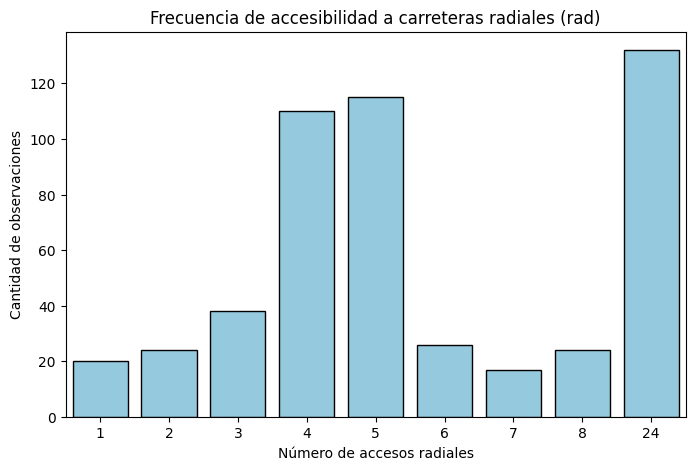

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='rad', data=df_train, color='skyblue', edgecolor='black')
plt.title('Frecuencia de accesibilidad a carreteras radiales (rad)')
plt.xlabel('Número de accesos radiales')
plt.ylabel('Cantidad de observaciones')
plt.show()

**Interpretacion:**
- El valor `rad` = 24 tiene la frecuencia más alta, con 132 viviendas, lo que indica que una gran parte del dataset proviene de una zona con altísimo acceso radial (conectividad vial máxima).
- También hay una gran concentración en `rad` = 5 (115 viviendas) y rad = 4 (110 viviendas).
- Los valores más bajos como `rad` = 1, 2, 6, 7, 8 tienen frecuencias más pequeñas, lo que indica menos viviendas en zonas con baja conectividad vial.

**Conclusion:**
- Existe una distribución desigual en los niveles de `rad`. La mayoría de viviendas están en zonas con conectividad alta (24) o moderada (4 a 5).
- Esta variable puede tener un impacto importante en el análisis del valor medio de las viviendas (`medv`), ya que la accesibilidad podría estar relacionada con el precio.
- Debido a su naturaleza ordinal, podría usarse como variable explicativa en modelos predictivos.

##### **3.3.2.3. Gráfico Circular (Pie Chart)**

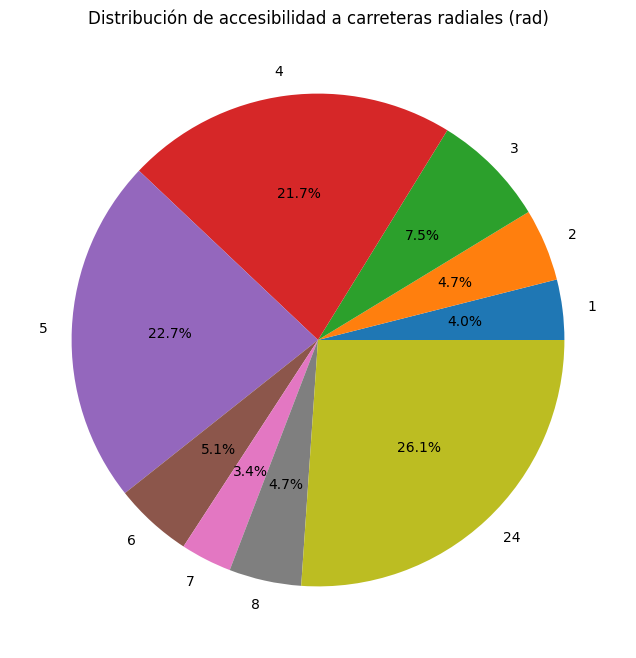

In [32]:
df_train['rad'].value_counts().sort_index().plot.pie(
    autopct='%1.1f%%',
    figsize=(8, 8),
    title='Distribución de accesibilidad a carreteras radiales (rad)'
)
plt.ylabel('')
plt.show()

**Conclusion:**

Este gráfico circular de la variable `rad` muestra que, aunque existen múltiples niveles de accesibilidad vial, la distribución se encuentra altamente concentrada en tres niveles (rad = 4, 5, 24), lo que sugiere posibles zonas geográficas con infraestructura dominante. Esta información es clave para entender el entorno urbano del dataset y su posible impacto sobre el valor de las propiedades.

#### **3.3.3. Relación con Variables Numéricas**

Correlación entre medv y crim: -0.388


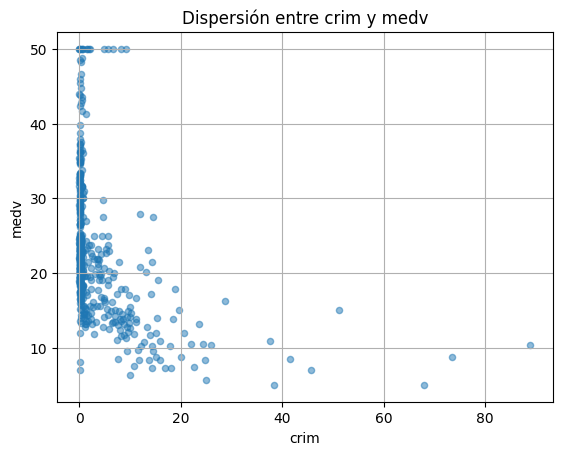

Correlación entre medv y zn: 0.360


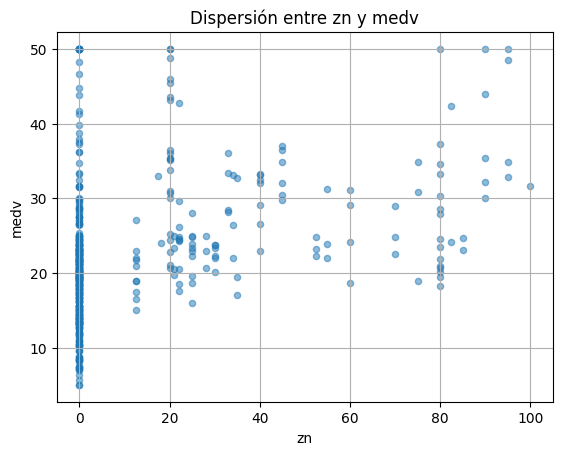

Correlación entre medv y indus: -0.484


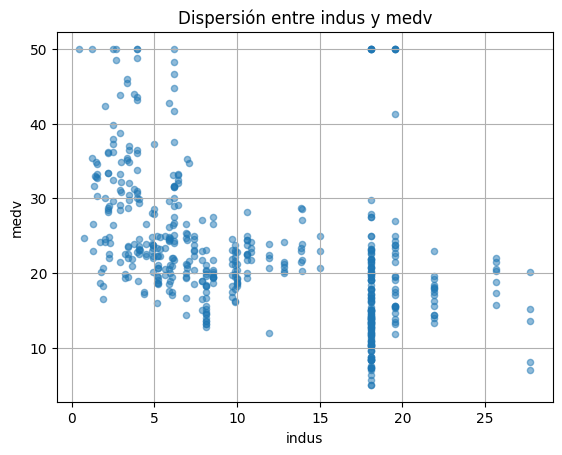

Correlación entre medv y nox: -0.427


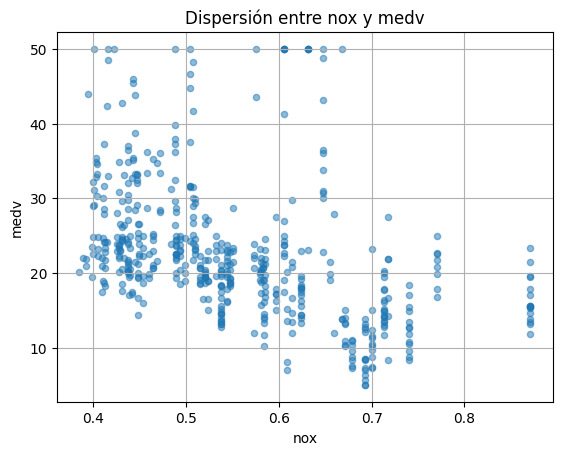

Correlación entre medv y rm: 0.695


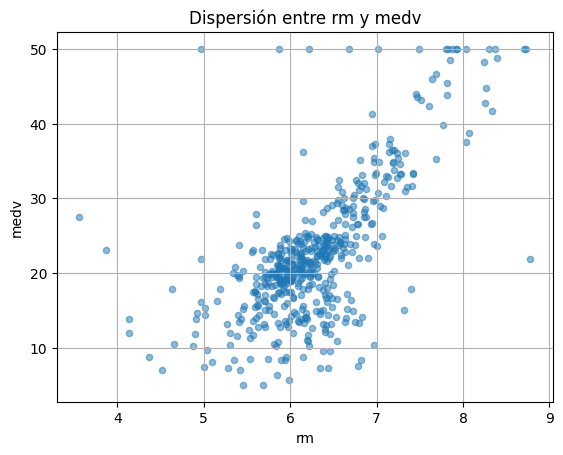

Correlación entre medv y edad: -0.377


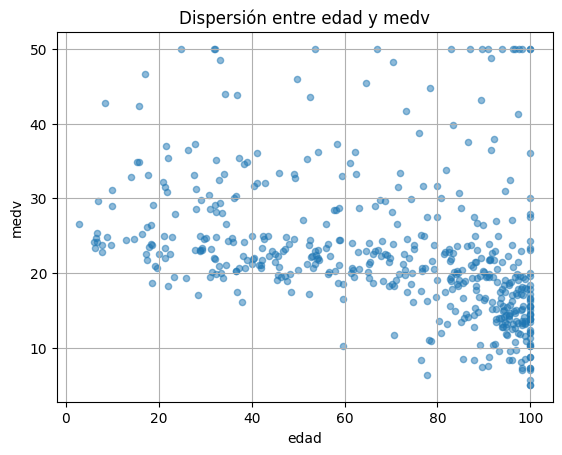

Correlación entre medv y dis: 0.250


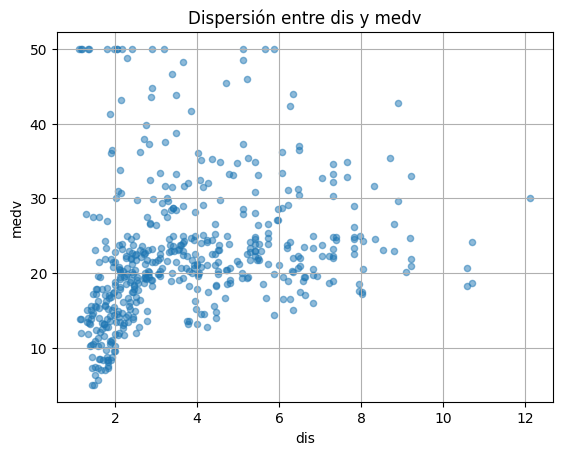

Correlación entre medv y rad: -0.382


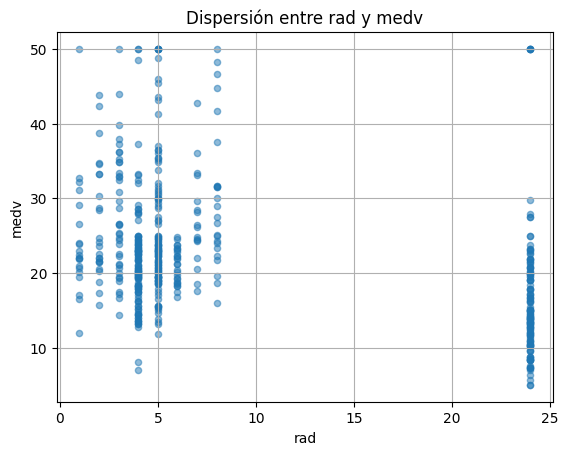

Correlación entre medv y impuesto: -0.469


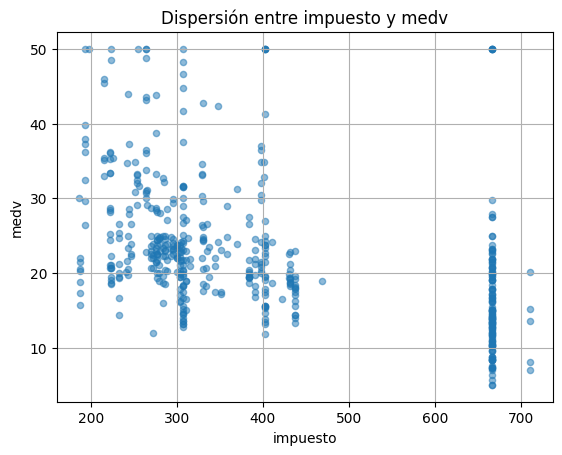

Correlación entre medv y ptratio: -0.508


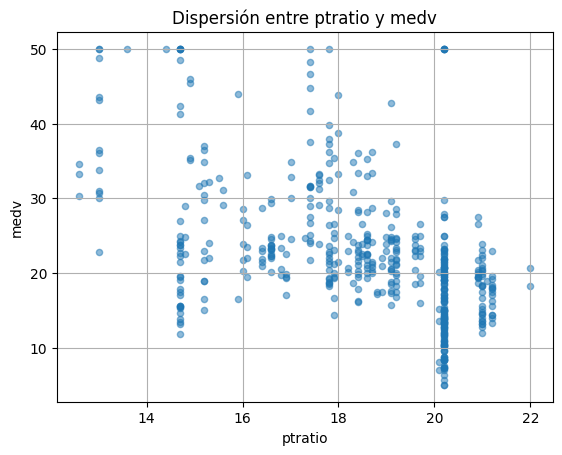

Correlación entre medv y negro: 0.333


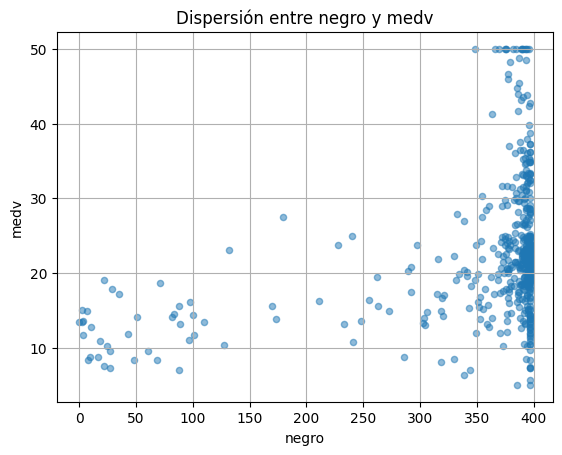

Correlación entre medv y lstat: -0.738


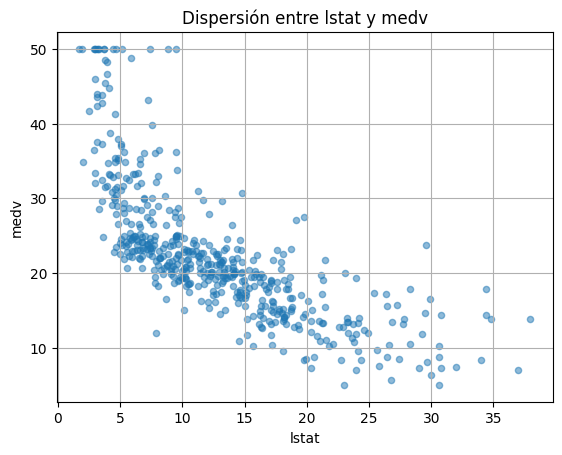

In [33]:
# Eliminamos filas con valores nulos
df_train = df_train.dropna(how='any')

# Recalculamos la lista de variables cuantitativas
lista_cuantitativas = list(df_train.describe().columns)

# Importamos numpy
import numpy as np

# Recorremos las variables y graficamos su relación con la variable objetivo 'medv'
for var in lista_cuantitativas:
    if var != 'medv':  # evitamos correlacionar medv consigo misma
        correlacion = np.corrcoef(df_train['medv'], df_train[var])[0, 1]
        print(f"Correlación entre medv y {var}: {correlacion:.3f}")

        data = pd.concat([df_train['medv'], df_train[var]], axis=1)
        data.plot.scatter(x=var, y='medv', alpha=0.5)
        plt.title(f'Dispersión entre {var} y medv')
        plt.grid(True)
        plt.show()


**Analisis por Variable**

| Variable   | Descripción                                                | Relación esperada con `medv`     | Tipo de correlación             | Comentario                                                               |
| ---------- | ---------------------------------------------------------- | -------------------------------- | ------------------------------- | ------------------------------------------------------------------------ |
| `crim`     | Tasa de criminalidad por zona                              | A mayor `crim`, menor `medv`     | Negativa (débil a moderada)  | Las zonas con más crimen tienden a tener viviendas más baratas.          |
| `zn`       | Proporción de terrenos residenciales de gran tamaño        | A mayor `zn`, mayor `medv`       | Positiva (débil)             | Urbanizaciones con más terrenos grandes tienden a ser más caras.         |
| `indus`    | % de terrenos no comerciales usados para negocios          | A mayor `indus`, menor `medv`    | Negativa (débil a moderada)  | Zonas más industriales suelen tener menor valor de vivienda.             |
| `nox`      | Concentración de óxidos nítricos (contaminación del aire)  | A mayor `nox`, menor `medv`      | Negativa (moderada a fuerte) | Mayor contaminación se relaciona con menor valor de vivienda.            |
| `rm`       | N° promedio de habitaciones por vivienda                   | A mayor `rm`, mayor `medv`       | Positiva (fuerte)            | Una de las variables más predictivas: más habitaciones, casas más caras. |
| `edad`     | % de casas construidas antes de 1940                       | A mayor `edad`, menor `medv`     | Negativa (débil a moderada)  | Las casas más antiguas tienden a valer menos.                            |
| `dis`      | Distancia a centros de empleo                              | A mayor `dis`, mayor `medv`      | Positiva (débil a moderada)  | Las casas más alejadas de centros industriales pueden valer más.         |
| `rad`      | Índice de accesibilidad a carreteras radiales              | Relación no lineal, dispersa     | No clara / débil             | Puede influir, pero no tiene una tendencia clara.                        |
| `impuesto` | Tasa de impuesto a la propiedad                            | A mayor `impuesto`, menor `medv` | Negativa (moderada)          | Zonas con impuestos altos pueden tener menor valor percibido.            |
| `ptratio`  | Ratio de alumnos por maestro en escuelas                   | A mayor `ptratio`, menor `medv`  | Negativa (moderada)          | Menos calidad educativa implica menor atractivo residencial.             |
| `negro`    | Proporción de población afroamericana (variable histórica) | Relación débil / controvertida   | Ambigua o artificial          | Esta variable ya no se considera ética ni relevante.                     |
| `lstat`    | % de población con bajos ingresos                          | A mayor `lstat`, menor `medv`    | Negativa (fuerte)            | Muy fuerte: pobreza afecta el valor de las viviendas.                    |
| `medv`     | Valor medio de vivienda                                    | -                                | -                               | Variable objetivo.                                                       |

**Variables con mayor correlación absoluta con medv (esperado):**

- Positiva fuerte: `rm`
- Negativa fuerte: `lstat`, `nox`
- Moderada: `ptratio`, `dis`, `indus`, `edad`

#### **3.3.4 Relación de variables numéricas continuas con numericas discretas**
Ver cómo se comporta la variable objetivo `medv` frente a variables numéricas discretas (es decir, que toman pocos valores distintos aunque sean numéricas, como 0, 1, 2...).


##### **3.3.4.1 Variable Discreta: `rad`**

La variable rad es un excelente ejemplo de variable numérica discreta. Representa el índice de accesibilidad a carreteras radiales y toma pocos valores distintos (como 1, 2, 3, ..., 24).

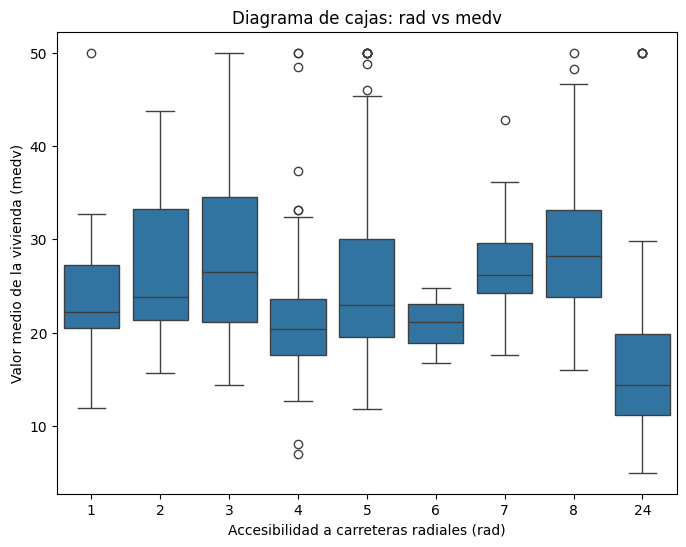

In [34]:
# Relación de variable discreta 'rad' con la variable objetivo 'medv'
var = 'rad'
data = pd.concat([df_train['medv'], df_train[var]], axis=1)

plt.figure(figsize=(8, 6))
sns.boxplot(x=var, y="medv", data=data)
plt.title(f'Diagrama de cajas: {var} vs medv')
plt.xlabel('Accesibilidad a carreteras radiales (rad)')
plt.ylabel('Valor medio de la vivienda (medv)')
plt.show()

**Analisis:**
- En general, no hay una relación lineal directa clara entre el índice `rad` y el valor medio de la vivienda.
- Las categorías con mayor cantidad de datos (`rad` = 4, `rad` = 5, `rad` = 24) presentan cajas bien definidas que permiten una mejor comparación.
- Los valores de `medv` para `rad` = 4 y `rad` = 5 tienden a concentrarse entre 20 y 30, lo que sugiere una clase media-alta en esas zonas.
- Para `rad` = 24 (la más frecuente), hay mayor dispersión de valores, incluyendo precios más bajos y también algunos altos.
- Las categorías con pocos datos (`rad` = 1, `rad` = 2, `rad` = 7, etc.) muestran cajas muy estrechas o solo una línea (lo que indica pocos valores, no necesariamente conclusiones confiables).
- Algunas categorías muestran puntos atípicos (por ejemplo, en `rad` = 24), lo que refleja propiedades con precios muy por encima del promedio dentro de esa categoría.

**Conclusion:**
- La accesibilidad a carreteras (medida por `rad`) sí influye parcialmente en el precio de la vivienda, pero no es un predictor fuerte por sí sola.
- Es probable que `rad` se combine con otras variables como `rm` (número de habitaciones), `lstat` (población de bajos recursos), o `tax` (impuesto a la propiedad) para explicar mejor `medv`.
- Las categorías con más frecuencia (`rad` = 4, 5, 24) deben considerarse especialmente en modelos, ya que tienen más información confiable.

## **ETAPA 4:** Examen Gráfico y Descriptivo Numérico

### **4.1. Análisis multivariado**
Se busca detectar relaciones más profundas y objetivas entre varias variables a la vez, especialmente con la variable objetivo (`medv`)

#### **4.1.1. Mapa de Correlaciones - Mapa de Calor**
Esto te ayuda a identificar qué variables están más relacionadas con el precio (`medv`).

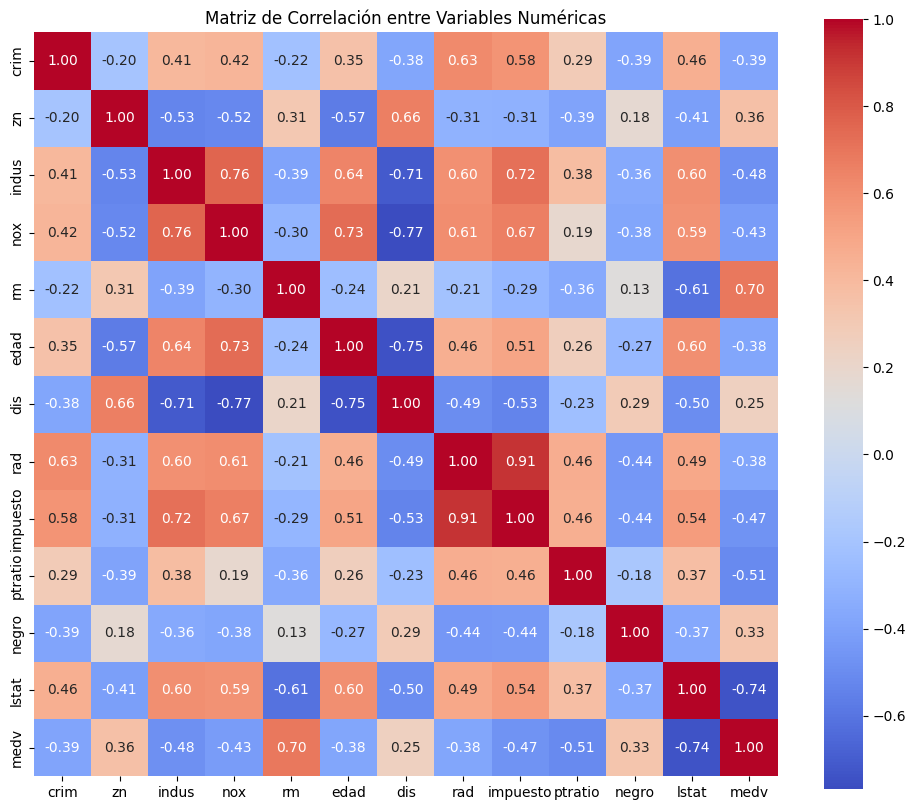

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la matriz de correlación solo con variables numéricas
correlation_matrix = df_train.corr(numeric_only=True)

# Definimos el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Dibujamos el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Título del gráfico
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

**Analisis del Mapa de Correlaciones - Mapa de Calor**

| Variable  | Correlación con `medv` | Tipo de Correlación                                                                   | Interpretación |
| --------- | ---------------------- | ------------------------------------------------------------------------------------- | -------------- |
| `lstat`   | Alta negativa        | Cuanto mayor es el % de personas de bajos ingresos, menor es el valor de la vivienda. |                |
| `rm`      | Alta positiva        | A mayor cantidad de habitaciones por vivienda, mayor es el valor de la vivienda.      |                |
| `ptratio` | Negativa             | A mayor ratio de alumnos por profesor, menor es el valor de la vivienda.              |                |
| `indus`   | Negativa moderada    | Zonas más industriales tienden a tener viviendas de menor valor.                      |                |
| `impuesto`     | Negativa moderada    | A mayores impuestos a la propiedad, menor el valor medio de las viviendas.            |                |
| `nox`     | Negativa moderada    | Altos niveles de contaminación se asocian con valores bajos.                          |                |
| `crim`    | Débil a moderada     | A mayor criminalidad, menor valor de vivienda.                                        |                |
| `dis`     | Positiva débil       | Las viviendas más alejadas del centro tienen un valor un poco más alto.               |                |
| `age`     | Débil negativa       | Las viviendas más antiguas suelen tener menor valor.                                  |                |

**Conclusion:**
- Las variables más relevantes para predecir el precio (`medv`) son: `lstat`, `rm` y `ptratio`.
- Hay algunas correlaciones entre las variables predictoras entre sí. Si son muy altas (ej. `impuesto` y `rad`), se puede evaluar eliminar una para evitar multicolinealidad.
- Este análisis sirve como base para seleccionar variables importantes en un futuro modelo predictivo.

##### **4.1.1.1. Matriz de correlación centrada en la variable `medv`**

In [37]:
# Matriz de correlación centrada en 'medv'
corr_matrix = df_train.corr(numeric_only=True)
corr_medv = corr_matrix['medv'].sort_values(ascending=False)

# Mostrar top 10 variables con mayor y menor correlación
print("Top 10 correlaciones positivas con 'medv':")
print(corr_medv.head(11))  # incluye 'medv' como 1.0

print("\nTop 10 correlaciones negativas con 'medv':")
print(corr_medv.tail(10))

Top 10 correlaciones positivas con 'medv':
medv        1.000000
rm          0.695360
zn          0.360445
negro       0.333461
dis         0.249929
edad       -0.376955
rad        -0.381626
crim       -0.388305
nox        -0.427321
impuesto   -0.468536
indus      -0.483725
Name: medv, dtype: float64

Top 10 correlaciones negativas con 'medv':
negro       0.333461
dis         0.249929
edad       -0.376955
rad        -0.381626
crim       -0.388305
nox        -0.427321
impuesto   -0.468536
indus      -0.483725
ptratio    -0.507787
lstat      -0.737663
Name: medv, dtype: float64


##### **4.1.1.2. Análisis de la Matriz de Correlación Centrada en `medv`**

**Top 4 correlaciones positivas con `medv`:**

| Variable            | Correlación | Interpretación                                                                                                                     |
| ------------------- | ----------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| `rm`                | **0.695**   | Las viviendas con más habitaciones promedio tienden a tener mayor valor (`medv`). Es la variable más positivamente correlacionada. |
| `zn`                | 0.360       | Zonas residenciales con baja densidad (más terreno) se asocian con viviendas de mayor valor.                                       |
| `negro`             | 0.333       | Proporción de población afroamericana: interpretación ambigua, puede depender de factores contextuales o de codificación inversa.  |
| `dis`               | 0.250       | Mayor distancia a centros de empleo se relaciona con viviendas más caras, posiblemente por estar en zonas suburbanas.              |

 **Top 4 correlaciones negativas con `medv`:**

 | Variable   | Correlación | Interpretación                                                                                    |
| ---------- | ----------- | ------------------------------------------------------------------------------------------------- |
| `lstat`    | **-0.738**  | A mayor porcentaje de población de bajo nivel socioeconómico, menor es el valor de las viviendas. |
| `ptratio`  | -0.508      | Mayor proporción alumno/profesor en las escuelas se asocia a viviendas más baratas.               |
| `indus`    | -0.484      | Áreas más industriales tienden a tener valores más bajos de vivienda.                             |
| `impuesto` | -0.469      | Impuestos más altos se correlacionan con menor valor de vivienda.                                 |[texto del enlace](https://)

**Conclusion**

Las variables más influyentes (positiva y negativamente) en el valor de las viviendas (`medv`) son:

- `rm` (número de habitaciones promedio) → positivamente correlacionada.
- `lstat` (porcentaje de población con bajos ingresos) → fuertemente negativa.
- `ptratio`, `indus`, `impuesto`→ también muestran correlación negativa significativa.

Estas variables deben ser priorizadas en modelos predictivos o análisis más profundos, ya que explican buena parte de la variabilidad en medv.

#### **4.1.2. Diagramas de Dispersión entre `medv` y sus Variables Correlacionadas**

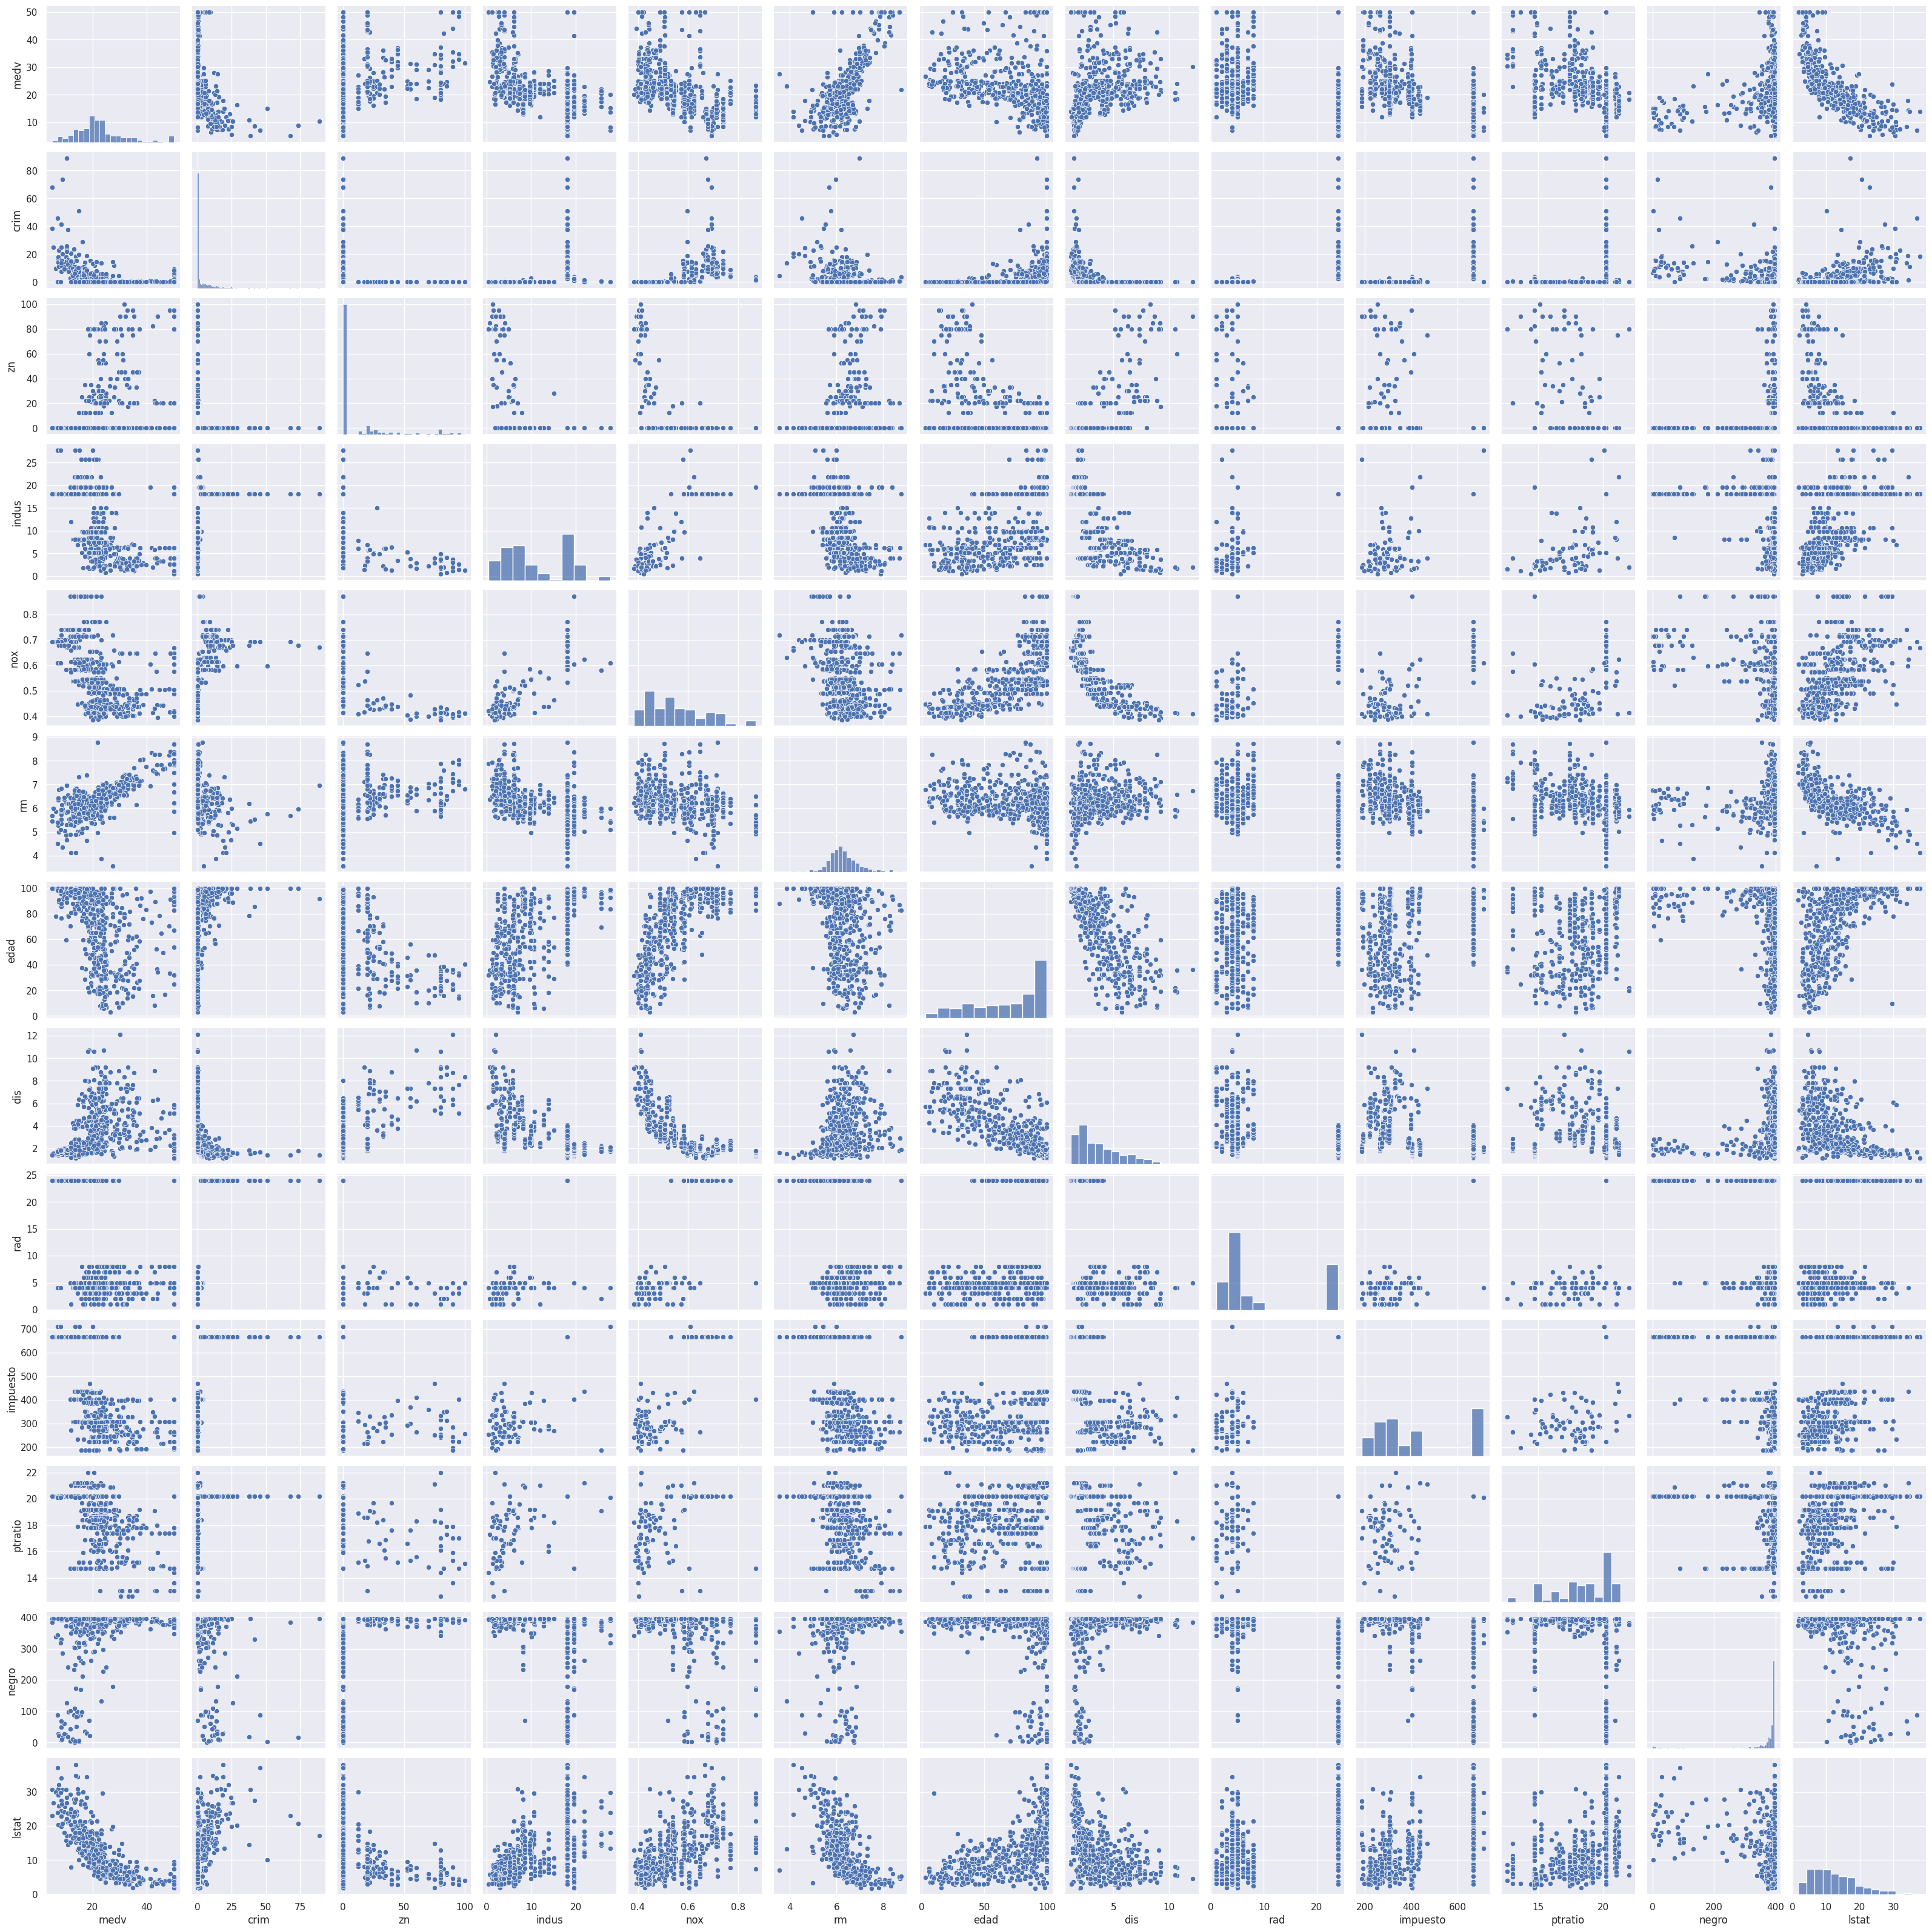

In [42]:
# Scatter plot (pairplot)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
cols = ['medv', 'crim', 'zn', 'indus', 'nox', 'rm', 'edad',
        'dis', 'rad', 'impuesto', 'ptratio', 'negro', 'lstat']
sns.pairplot(df_train[cols], height=2.5)
plt.show()

**Analisis detallado de Variables con respecto a `medv`**


| Variable                                                 | Relación esperada con `medv` | Tipo de relación | **Análisis y observaciones detalladas**                                                                                                                                                                                                                                                                                          |
| -------------------------------------------------------- | ---------------------------- | ---------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`rm`** (número promedio de habitaciones)               | Positiva fuerte           | Lineal           | **Es la relación positiva más clara del conjunto.** A mayor cantidad de habitaciones por vivienda, el valor aumenta. Se ve una fuerte tendencia ascendente, con pocos outliers. Esto indica que el espacio (cantidad de cuartos) es un factor clave en la valorización inmobiliaria.                                             |
| **`zn`** (zonificación residencial)                      | Positiva moderada         | No lineal clara  | Aunque la relación general es positiva, hay muchos ceros en `zn` (zonas sin gran zonificación), lo que genera un patrón de dispersión irregular. En valores altos de `zn`, se observa una mayor concentración de viviendas más caras, lo que respalda que zonas exclusivas (con terrenos grandes) elevan los precios.            |
| **`negro`** (proporción transformada de población negra) | Positiva débil a moderada | Curvilínea       | Hay mucha dispersión, pero una leve tendencia positiva. Sin embargo, este indicador es discutido por su complejidad sociológica. En datos modernos no suele usarse. El comportamiento muestra una relación no lineal: valores bajos y muy altos no afectan mucho, pero en valores medios hay cierta asociación con mayor `medv`. |
| **`dis`** (distancia a centros de empleo)                | Positiva débil            | Dispersa         | Las viviendas más alejadas de los centros urbanos pueden tener valores ligeramente más altos, posiblemente por estar en zonas residenciales más tranquilas. Sin embargo, hay mucha dispersión: la accesibilidad aún importa. Se ven patrones inversos en ciudades distintas.                                                     |
| **`edad`** (antigüedad del inmueble)                     | Negativa moderada         | Inversa          | A mayor antigüedad (valores altos), el valor de la vivienda tiende a bajar. Aunque hay excepciones (casas antiguas pero bien ubicadas o remodeladas), la tendencia general es descendente. Relación más visible en zonas intermedias de `edad`.                                                                                  |
| **`rad`** (acceso a autopistas)                          | Negativa moderada         | Escalonada       | Variable con muchos valores repetidos, lo que genera agrupaciones. Alta accesibilidad no siempre implica mayor valor; en este caso, parece asociarse a zonas urbanas densas y menos valoradas. Hay grupos de viviendas con `rad` alto y bajo `medv`, indicando efectos de ruido o congestión.                                    |
| **`crim`** (tasa de criminalidad)                        | Negativa moderada         | Dispersa         | Se observa una tendencia descendente: zonas con alta criminalidad tienen viviendas más baratas. Sin embargo, hay bastantes outliers (viviendas costosas en zonas con criminalidad media), lo que sugiere que otros factores también influyen.                                                                                    |
| **`nox`** (contaminación)                                | Negativa moderada         | Curvilínea       | Se aprecia que en zonas con mayor concentración de óxidos de nitrógeno, los precios son menores. Relación más marcada en valores medios-altos de `nox`. Podría estudiarse más con una transformación no lineal (log, cuadrática).                                                                                                |
| **`impuesto`** (impuesto a la propiedad)                 | Negativa moderada         | Dispersa         | En general, zonas con impuestos altos tienen menor `medv`, aunque es contraintuitivo (normalmente los impuestos son mayores en zonas más valorizadas). Esto puede deberse a diferencias de políticas fiscales o distritos. Hay dispersión importante.                                                                            |
| **`indus`** (zona industrial)                            | Negativa moderada         | Lineal débil     | A medida que aumenta la proporción de área industrial, disminuye el valor de las viviendas. El gráfico muestra una tendencia leve descendente, especialmente en valores intermedios de `indus`.                                                                                                                                  |
| **`ptratio`** (alumnos por profesor)                     | Negativa fuerte           | Lineal clara     | Variable crítica. Un mayor ratio indica menor calidad educativa, lo que reduce el valor de las viviendas. Hay una tendencia claramente lineal descendente. Las familias prefieren distritos con mejores colegios.                                                                                                                |
| **`lstat`** (porcentaje de población de bajo estatus)    | Negativa muy fuerte       | Lineal clara     | Es la relación negativa más fuerte del conjunto. A mayor `lstat`, menor `medv`. La relación es muy clara, directa, y lineal. Esta variable puede ser un gran predictor para modelos de regresión. Refleja el impacto del entorno socioeconómico en el precio inmobiliario.                                                       |
| **`medv`** (valor de la vivienda)                        | —                            | —                | Es la variable dependiente o de respuesta, está presente como referencia. Los gráficos permiten ver cómo se distribuye respecto a cada predictor.                                                                                                                                                                                |


**Conclusiones**
- Las variables más influyentes en el valor de la vivienda (`medv`) son:
   
   Positivas: `rm`, `zn` (moderada), `dis` (leve).
   
   Negativas: `lstat`, `ptratio`, `nox`, `crim`, `impuesto`, `edad`, `indus`.

- Las relaciones lineales más claras (útiles para modelos de regresión lineal) son:

   Positivas: `rm`
   Negativas: `lstat`, `ptratio`

- Variables como `rad`, `zn`, `negro` e `impuesto` pueden tener comportamientos no lineales o agrupados, por lo que podrían necesitar transformación o ser mejor aprovechadas en modelos no lineales (como árboles o random forest).

- Outliers y sesgos visibles en algunas variables (`crim`, `zn`, `rad`, `negro`) deben ser tratados o considerados para evitar distorsión del modelo.

## **ETAPA 5:** Revision de Nulos

### **5.1. Limpieza de Datos**

In [43]:
# Recuperar el respaldo cuando sea necesario
df_train = df_train_bk.copy()

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   crim      506 non-null    float64
 1   zn        506 non-null    float64
 2   indus     506 non-null    float64
 3   nox       506 non-null    float64
 4   rm        506 non-null    float64
 5   edad      506 non-null    float64
 6   dis       506 non-null    float64
 7   rad       506 non-null    int64  
 8   impuesto  506 non-null    int64  
 9   ptratio   506 non-null    float64
 10  negro     506 non-null    float64
 11  lstat     506 non-null    float64
 12  medv      506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


**Análisis del estado del DataFrame**

- **Cantidad de datos por columna:**

  Todas las columnas tienen 506 valores no nulos, lo que significa que no hay valores faltantes (nulos) en tu base de datos.

- **Tipos de datos correctos:**

  **Todas las variables numéricas** (float64 o int64) están bien tipificadas.

  **No hay columnas tipo object**, así que no hay problemas de codificación o errores tipográficos.

**Limpieza de datos Faltantes**

No es necesario, el dataset no requiere limpieza de valores nulos.



## **ETAPA 6:** ETAPA DE MODELADO PREDICTIVO
Desarrollar un modelo de aprendizaje automático que permita predecir el precio medio de las viviendas (medv)

### **6.1. Seleccionar las variables más influyentes**
Las más correlacionadas con medv son:

- Positivas: `rm`, `zn` (moderada), `dis` (leve).
- Negativas: `lstat`, `ptratio`, `nox`, `crim`, `impuesto`, `edad`, `indus`.

Vamos a usarlas como predictores.

### **6.2. Crear el modelo predictivo (Regresión lineal)**

In [63]:
# Importar librerias necesarias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [64]:
# Definir variables predictoras y variable objetivo
# Variables independientes (predictoras)
X = df_train[['rm', 'zn', 'dis', 'lstat', 'ptratio', 'nox', 'crim', 'impuesto', 'edad', 'indus']]

# Variable dependiente (objetivo)
y = df_train['medv']

In [65]:
# Dividir los datos en entrenamiento y prueba
# Usamos 80% para entrenar y 20% para probar el modelo:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [66]:
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [67]:
# Realizar predicciones
y_pred = modelo.predict(X_test)

In [68]:
# Evaluar el modelo
# Coeficiente de determinación R² (qué tan bien se ajusta el modelo)
r2 = r2_score(y_test, y_pred)

# Raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Coeficiente de determinación R²:", round(r2, 4))
print("Error cuadrático medio (RMSE):", round(rmse, 4))

Coeficiente de determinación R²: 0.6555
Error cuadrático medio (RMSE): 5.0266


**Evaluacion del Modelo**

| Métrica  | Valor  | Interpretación                                                                                                                                          |
| -------- | ------ | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **R²**   | 0.6555 | Esto indica que el modelo logra explicar el 65.55% de la variabilidad del precio de las viviendas. Es un valor aceptable para un modelo lineal simple, pero sugiere que un 34.45% de la variabilidad no se explica por las variables usadas. Implica que existen otros factores o relaciones no lineales que el modelo no está capturando. |
| **RMSE** | 5.03   | En promedio, el modelo comete un error de ±5 mil dólares al predecir el precio de una vivienda.Es un margen de error moderado, considerando que los precios (medv) oscilan entre 5 y 50. |


In [69]:
# Ver coeficientes de cada variable
coef = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": modelo.coef_
})
coef.sort_values(by="Coeficiente", ascending=False)

,Variable,Coeficiente
0,rm,4.608239
1,zn,0.024856
7,impuesto,-0.000972
8,edad,-0.005531
9,indus,-0.006654
6,crim,-0.102225
3,lstat,-0.545268
4,ptratio,-0.828122
2,dis,-1.464447
5,nox,-15.261845


**Importancia e Interpretacion de los Coeficientes**

Significado de los coeficientes del modelo (en miles de dólares):

| Variable   | Coeficiente | Interpretación                                                                                                |
| ---------- | ----------- | ------------------------------------------------------------------------------------------------------------- |
| `rm`       | +4.61       | Cada habitación extra aumenta el valor promedio en **\$4,610**. Variable **más influyente y positiva**.       |
| `zn`       | +0.025      | Zonas con más terreno residencial tienen ligero impacto positivo. Poco influyente.                            |
| `dis`      | **-1.46**   | A mayor distancia de centros laborales, **disminuye el valor**. Inesperado, podría ser por multicolinealidad. |
| `nox`      | **-15.26**  | Alta contaminación ambiental disminuye el valor en **\$15,260** por cada unidad de NOx. Altamente negativa.   |
| `lstat`    | -0.55       | A mayor porcentaje de población de bajo estatus, el valor baja **\$550**. Relación **negativa fuerte**.       |
| `ptratio`  | -0.83       | A mayor ratio alumno/profesor, menor calidad educativa, y menor valor de la vivienda.                         |
| `crim`     | -0.10       | Mayor crimen reduce el valor.                                                                                 |
| `edad`     | -0.006      | Leve efecto negativo de la antigüedad.                                                                        |
| `indus`    | -0.007      | Zonas industriales reducen el precio ligeramente.                                                             |
| `impuesto` | -0.00097    | Impuestos más altos afectan negativamente, aunque de forma muy leve.                                          |


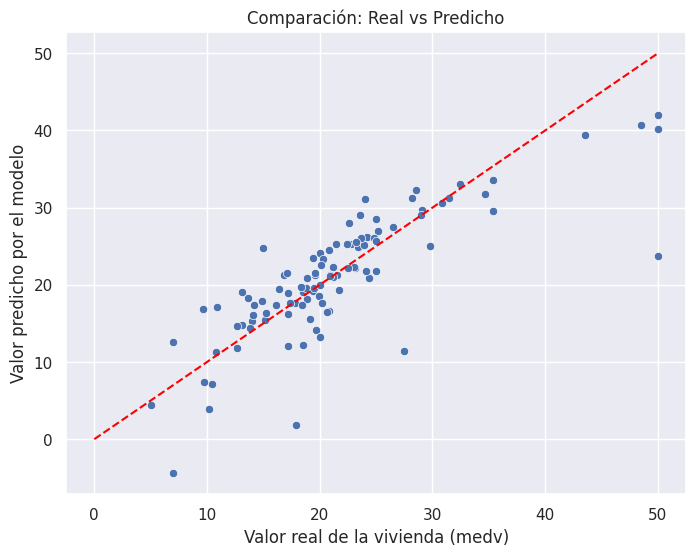

In [70]:
# Visualizar la predicción vs el valor real
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valor real de la vivienda (medv)")
plt.ylabel("Valor predicho por el modelo")
plt.title("Comparación: Real vs Predicho")
plt.plot([0, 50], [0, 50], '--', color='red')  # línea ideal
plt.show()

**Análisis del Gráfico: Real vs Predicho**

- **Eje X:** valor real de la variable objetivo medv (precio medio de la vivienda).
- **Eje Y:** valor predicho por el modelo de regresión lineal.
- **Línea roja punteada:** línea ideal donde el valor predicho = valor real (y = x).
- **Puntos azules:** observaciones del conjunto de prueba (real vs predicho).

**Aspectos Positivos (Fortalezas del Modelo)**

- **Tendencia lineal clara:** la mayoría de los puntos siguen una línea diagonal ascendente, lo que indica que el modelo sí capturó una relación entre las variables predictoras y medv.
- **Predicción razonable en el rango medio:**

  Entre 15 y 30 en el eje X, el modelo predice bastante bien.

  La mayoría de los puntos en este rango están cerca de la línea roja, lo cual sugiere buena precisión para viviendas de precio medio.

- **Sin sesgo extremo evidente:** No hay una gran acumulación de puntos por encima o debajo de la línea en todo el gráfico, lo que indica que el modelo no está sistemáticamente sobreestimando ni subestimando.


**Aspectos Negativos (Debilidades del Modelo)**
- **Errores grandes en extremos bajos y altos:**

  Hay varios puntos dispersos lejos de la línea cuando el valor real está cerca de 0 o mayor a 35.

  El modelo tiende a subestimar precios altos y sobreestimar algunos precios bajos, lo que es común en regresión lineal simple.

- **Algunos outliers importantes:**

  Hay casos donde el valor real es bajo (ej. 5) y el modelo predice valores muy superiores (ej. 20 o más).

  También hay viviendas reales con valores de 40 o más que el modelo predice entre 20 y 30.
  
- **Relación no completamente lineal:**

  Algunos errores podrían deberse a que la relación entre algunas variables predictoras y el precio de la vivienda no es lineal, algo que un modelo lineal no puede capturar bien.

**Conclusión del Modelo**

El modelo de regresión lineal es efectivo en el rango medio de precios, pero tiene dificultades en predecir viviendas con precios extremadamente bajos o altos. Esto sugiere que el modelo podría beneficiarse de:
- Ingeniería de variables (transformaciones),
- Eliminación o ajuste de outliers,
- Y/o modelos no lineales (como árboles o ensembles).

## **ETAPA 7:** CONCLUSIONES, RECOMENDACIONES Y SUGERENCIAS

**Conclusión Final**

El desarrollo de este modelo de regresión lineal para predecir el valor medio de las viviendas en Boston ha demostrado ser una herramienta útil y efectiva en el análisis del mercado inmobiliario. A partir del uso de variables predictoras significativas, se logró construir un modelo con un coeficiente de determinación (R²) de 0.6555 y un error cuadrático medio (RMSE) de 5.03, lo que indica un desempeño aceptable considerando la simplicidad del modelo.

Se evidenció que variables como:

- `rm` (número de habitaciones por vivienda) tiene una influencia positiva importante,

- mientras que `nox`, `lstat`, `ptratio` y `dis` tienen una influencia negativa significativa en el precio de las viviendas.

Esto permite concluir que factores relacionados con la calidad del entorno, la educación y la población en riesgo social influyen directamente en el valor inmobiliario.

**Recomendaciones**

- Usar el modelo como punto de partida para análisis de precios en zonas urbanas similares, especialmente en estudios exploratorios o para evaluar inversiones iniciales.

- Aplicar una validación cruzada y ajustar el modelo con técnicas de selección de variables (como RFE o Lasso) para mejorar la precisión.

- Ampliar el análisis con modelos no lineales, como árboles de decisión, random forest o regresión polinómica, que pueden captar mejor relaciones complejas entre variables.

- Monitorear el comportamiento del error, ya que el modelo tiende a cometer errores mayores en los valores extremos del precio.

**Sugerencias para proyectos futuros**

- Agregar nuevas variables externas, como distancia a servicios básicos, seguridad, transporte público o crecimiento urbano, que podrían tener alto impacto en el valor de las viviendas.

- Comparar múltiples modelos predictivos (regresión ridge, lasso, SVR, XGBoost, redes neuronales) para elegir el mejor en función del R² y RMSE.

- Crear un dashboard interactivo en Power BI o Streamlit para visualizar los resultados del modelo y realizar simulaciones con diferentes valores de entrada.

- Convertir el modelo en una herramienta de apoyo a decisiones inmobiliarias, útil para promotores, agentes o inversionistas.